In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))



%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 16

from scipy.interpolate import interpolate
import pandas as pd


In [47]:
filters = {'ha': {'3nm': '5698-ascii.txt', '5nm': '5703-ascii.txt', '8nm': '4795-ascii.txt'},
           'oiii': {'3nm': '5694-ascii.txt', '5nm': '5706-ascii.txt', '8nm': '4803-ascii.txt'}, 
           'sii':{'3nm': '5707-ascii.txt', '5nm': '5685-ascii.txt', '8nm': '4802-ascii.txt'}, 
          }

In [48]:
df_list = []
path = '/Volumes/Users/gshau/Downloads/'
for filter_name, data in filters.items():
    for bandpass, filename in data.items():
        df_input = pd.read_csv(f'{path}/{filename}', sep='\t', header=None)
        df_input.columns = ['wavelength', f'{filter_name}_{bandpass}']
        df_input.set_index('wavelength', inplace=True)
        df_list.append(df_input)

(650.0, 690.0)

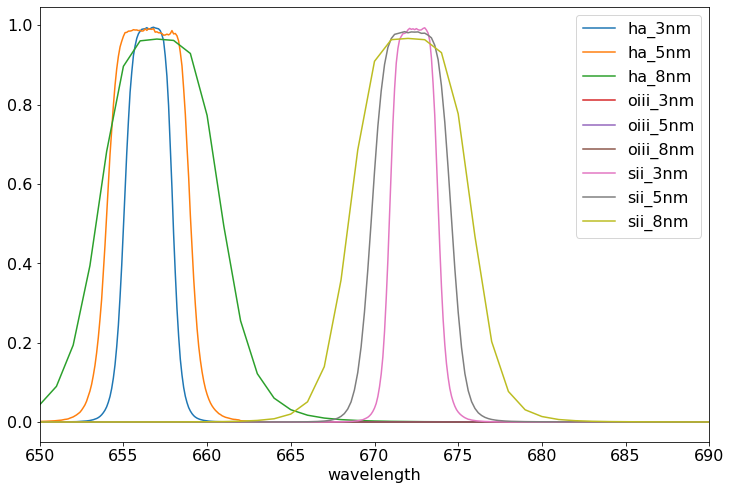

In [49]:
df_transmission = pd.concat(df_list)
df_transmission.plot()
plt.xlim(650, 690)

In [50]:
df_transmission.keys()

Index(['ha_3nm', 'ha_5nm', 'ha_8nm', 'oiii_3nm', 'oiii_5nm', 'oiii_8nm',
       'sii_3nm', 'sii_5nm', 'sii_8nm'],
      dtype='object')

In [51]:
f_transmission = {}

for filter_name in filters:
    for bandpass in ['3nm', '5nm', '8nm']:    
        key = f'{filter_name}_{bandpass}'
        df0 = df_transmission[key].dropna()
        f_transmission[key] = interpolate.interp1d(df0.index, df0.values)


In [52]:
n_index = 1.8

ha_line = 656.28
oiii_line = 500.824
sii_line = 671.829
# sii_line = 673.267

In [53]:
linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

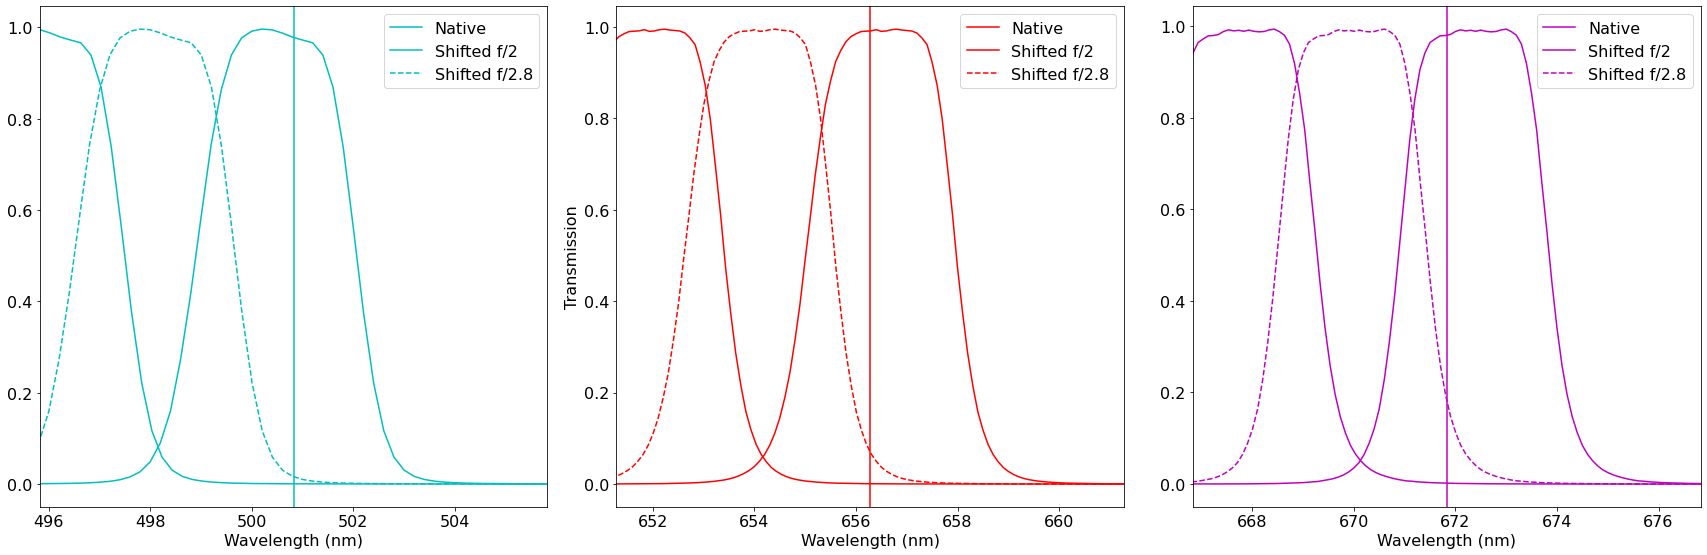

In [179]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)

bandpass = '3nm'
focal_ratios = [2, 2.8] #, 4, 4.6]


filter_name = 'oiii'
key = f'{filter_name}_{bandpass}'
plt.plot(df_transmission.index, df_transmission[key], 'c', label='Native')
for i, shift in enumerate(focal_ratios):
    fl = 1000
    aperture = fl / shift
    theta = get_theta(0, 0, aperture, 0, fl)
    plt.plot(df_transmission.index - wavelength_shift(oiii_line, theta, n_index), df_transmission[key], 'c', linestyle=linestyles[i], label=f'Shifted f/{shift}')
plt.legend()
plt.xlim(oiii_line - 5, oiii_line + 5)
plt.axvline(oiii_line, color='c')
plt.xlabel('Wavelength (nm)')

plt.subplot(1, 3, 2)
filter_name = 'ha'
key = f'{filter_name}_{bandpass}'
plt.plot(df_transmission.index, df_transmission[key], 'r', label='Native')
for i, shift in enumerate(focal_ratios):
    fl = 1000
    aperture = fl / shift
    theta = get_theta(0, 0, aperture, 0, fl)
    plt.plot(df_transmission.index - wavelength_shift(oiii_line, theta, n_index), df_transmission[key], 'r', linestyle=linestyles[i], label=f'Shifted f/{shift}')
plt.legend()
plt.xlim(ha_line - 5, ha_line + 5)
plt.axvline(ha_line, color='r')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')


plt.subplot(1, 3, 3)
filter_name = 'sii'
key = f'{filter_name}_{bandpass}'
plt.plot(df_transmission.index, df_transmission[key], 'm', label='Native')
for i, shift in enumerate(focal_ratios):
    fl = 1000
    aperture = fl / shift
    theta = get_theta(0, 0, aperture, 0, fl)
    plt.plot(df_transmission.index - wavelength_shift(oiii_line, theta, n_index), df_transmission[key], 'm', linestyle=linestyles[i], label=f'Shifted f/{shift}')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.xlim(sii_line - 5, sii_line + 5)
plt.axvline(sii_line, color='m')
plt.tight_layout()


/Volumes/Users/gshau/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Volumes/Users/gshau/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Volumes/Users/gshau/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous 

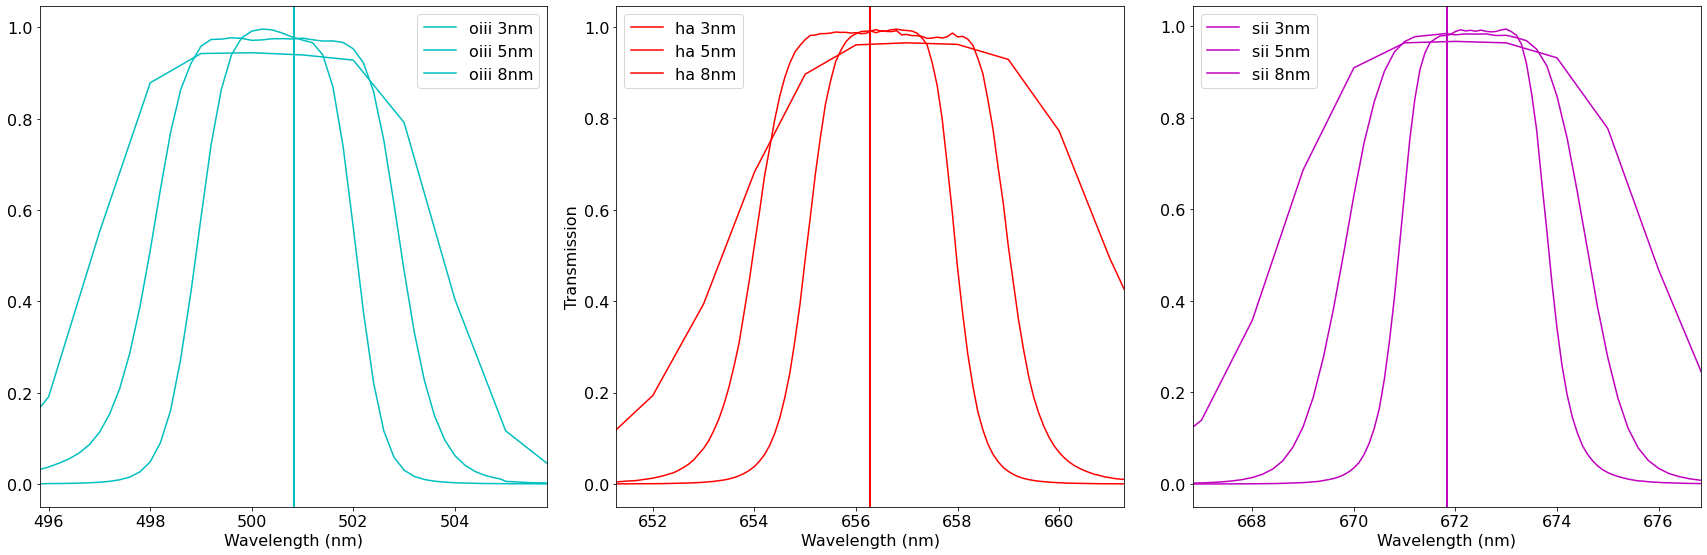

In [172]:
plt.figure(figsize=(24, 8))

for bandpass in bandpasses:
    plt.subplot(1, 3, 1)
    filter_name = 'oiii'
    key = f'{filter_name}_{bandpass}'
    plt.plot(df_transmission.index, df_transmission[key], 'c', label=f'{filter_name} {bandpass}')
    plt.legend()
    plt.xlim(oiii_line - 5, oiii_line + 5)
    plt.axvline(oiii_line, color='c')
    plt.xlabel('Wavelength (nm)')

    plt.subplot(1, 3, 2)
    filter_name = 'ha'
    key = f'{filter_name}_{bandpass}'
    plt.plot(df_transmission.index, df_transmission[key], 'r', label=f'{filter_name} {bandpass}')
    plt.legend()
    plt.xlim(ha_line - 5, ha_line + 5)
    plt.axvline(ha_line, color='r')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmission')


    plt.subplot(1, 3, 3)
    filter_name = 'sii'
    key = f'{filter_name}_{bandpass}'
    plt.plot(df_transmission.index, df_transmission[key], 'm', label=f'{filter_name} {bandpass}')
    plt.xlabel('Wavelength (nm)')
    plt.legend()
    plt.xlim(sii_line - 5, sii_line + 5)
    plt.axvline(sii_line, color='m')
    plt.tight_layout()


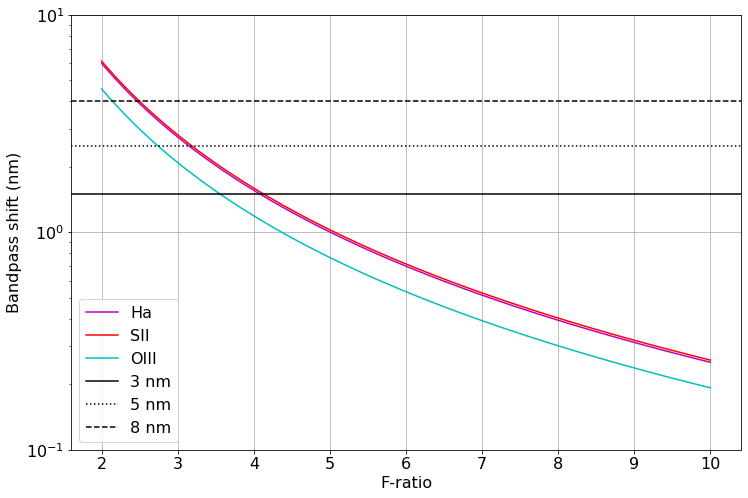

In [55]:
f_ratios = np.linspace(2, 10, 101)
plt.plot(f_ratios, wavelength_shift(ha_line, f_ratios, n_index), label='Ha', color='m')
plt.plot(f_ratios, wavelength_shift(sii_line, f_ratios, n_index), label='SII', color='r')
plt.plot(f_ratios, wavelength_shift(oiii_line, f_ratios, n_index), label='OIII', color='c')
plt.xlabel('F-ratio')
plt.yscale('log')
plt.ylim(.1, 10)
plt.axhline(1.5, color='k', linestyle='-', label='3 nm')
plt.axhline(2.5, color='k', linestyle=':', label='5 nm')
plt.axhline(4, color='k', linestyle='--', label='8 nm')
plt.ylabel('Bandpass shift (nm)')
plt.grid()
plt.legend()

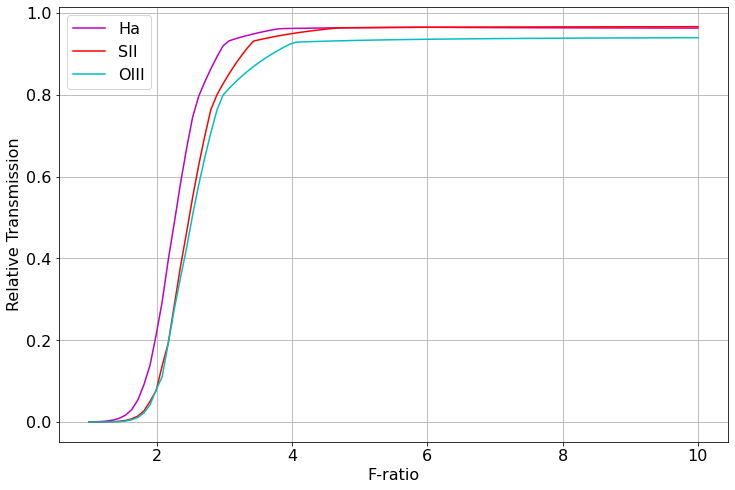

In [59]:
f_ratios = np.linspace(1, 10, 101)
bandpass = '8nm'
plt.plot(f_ratios, f_transmission[f'ha_{bandpass}'](wavelength_shift(ha_line, f_ratios, n_index) + ha_line), label='Ha', color='m')
plt.plot(f_ratios, f_transmission[f'sii_{bandpass}'](wavelength_shift(sii_line, f_ratios, n_index) + sii_line), label='SII', color='r')
plt.plot(f_ratios, f_transmission[f'oiii_{bandpass}'](wavelength_shift(oiii_line, f_ratios, n_index) + oiii_line), label='OIII', color='c')
plt.xlabel('F-ratio')
# plt.yscale('log')
# plt.ylim(.1, 1)
# plt.axhline(1.5, color='k', linestyle='-', label='3 nm')
# plt.axhline(2.5, color='k', linestyle=':', label='5 nm')
# plt.axhline(4, color='k', linestyle='--', label='8 nm')
plt.ylabel('Relative Transmission')
plt.grid()
plt.legend()

In [28]:
def get_full_transmission(f_ratio, n_index=1.8, filter_name='ha', bandpass='3nm'):

    fl = 100
    aperture = fl / f_ratio
    r_max = aperture / 2

    N_steps = int(1e4)
    dr = r_max / N_steps
    
    r = np.linspace(dr, r_max, N_steps)
    line_loc = bands[band]['wavelength']
#     func = bands[band]['func']
    func = f_transmission[f'{filter_name}_{bandpass}']
    
    lam = wavelength_shift(line_loc, fl / r, n_index) + line_loc
    
#     lam = (lam - line_loc) * 3 / 7 + line_loc
    
    transmission = (2 * np.pi * r * dr * func(lam)).sum()
    return transmission / (np.pi*r_max**2)



In [64]:
def get_theta(x, y, aperture, phi, fl):
    r = aperture / 2
    dx_plane = np.sqrt((x - r * np.cos(phi))**2 + (y - r * np.sin(phi))**2)
    return np.arctan(dx_plane / fl)

In [72]:
def wavelength_shift(lam0, theta, ref_index):
    frac_shift = np.sqrt(1 - np.sin(theta)**2 * (1. / ref_index**2))
    return lam0 * (1 - frac_shift)



In [73]:
def transmission_chip(x0, y0, r_min, r_max, focal_length, filter_name='ha', bandpass='3nm'):
    phi_vals = np.linspace(0, 2 * np.pi, 50)
    r_vals = np.linspace(r_min, r_max, 50)

    R, PHI = np.meshgrid(r_vals, phi_vals)
    
    THETA = get_theta(x0[None, None, :, :], y0[None, None, :, :], R[:, :, None, None], PHI[:, :, None, None], focal_length)

    line_loc = bands[filter_name]['wavelength']
    func = f_transmission[f'{filter_name}_{bandpass}']

    
    lam = wavelength_shift(line_loc, THETA, n_index) + line_loc
    
#     lam = (lam - line_loc) * 3 / bandpass + line_loc
    
    d_transmission = func(lam)
    T = ((R[:, :, None, None] * d_transmission).sum(axis=0).sum(axis=0) / (d_transmission.max() * R[:, :, None, None]).sum(axis=0).sum(axis=0))
    return T

In [74]:
f_transmission

{'ha_3nm': <scipy.interpolate.interpolate.interp1d at 0x7f98cd1e7c78>,
 'ha_5nm': <scipy.interpolate.interpolate.interp1d at 0x7f98d9113b88>,
 'ha_8nm': <scipy.interpolate.interpolate.interp1d at 0x7f98ccd73d18>,
 'oiii_3nm': <scipy.interpolate.interpolate.interp1d at 0x7f98cd11c138>,
 'oiii_5nm': <scipy.interpolate.interpolate.interp1d at 0x7f98d89f0368>,
 'oiii_8nm': <scipy.interpolate.interpolate.interp1d at 0x7f98cd1ded18>,
 'sii_3nm': <scipy.interpolate.interpolate.interp1d at 0x7f9888181ef8>,
 'sii_5nm': <scipy.interpolate.interpolate.interp1d at 0x7f98d903c188>,
 'sii_8nm': <scipy.interpolate.interpolate.interp1d at 0x7f98cd1bcc78>}

In [75]:
fr = np.linspace(2.8, 20, 2000)

bands = {}
bands['ha'] = {'wavelength': ha_line}
bands['sii'] = {'wavelength': sii_line}
bands['oiii'] = {'wavelength': oiii_line}

In [119]:
micron = 1e-3
downsample = 50

# # APS-C
# width = 25.1
# height = 16.7

# Full-Frame
width = 36
height = 24
pixel_size = 3.76 * micron * downsample

n_x = int(width / pixel_size)
n_y = int(height / pixel_size)

x = np.linspace(-width / 2, width / 2, n_x)
y = np.linspace(-height / 2, height / 2, n_y)

X, Y = np.meshgrid(x, y)

X.shape

(127, 191)

In [120]:
cmaps = ['BuPu_r', 'cividis', 'coolwarm_r', 'summer_r']

In [126]:
T[:, 95]

array([0.99625002, 0.99628794, 0.99632544, 0.99636247, 0.99639901,
       0.99643507, 0.99647048, 0.99650549, 0.9965401 , 0.99657415,
       0.99660763, 0.99664069, 0.99667329, 0.9967054 , 0.996737  ,
       0.99676801, 0.99679864, 0.99682887, 0.99685851, 0.99688755,
       0.99691618, 0.99694439, 0.99697211, 0.99699925, 0.99702591,
       0.99705207, 0.99707779, 0.99710299, 0.99712756, 0.99715171,
       0.99717543, 0.99719862, 0.9972212 , 0.99724314, 0.99726473,
       0.99728577, 0.9973062 , 0.9973259 , 0.99734505, 0.99736364,
       0.99738158, 0.99739849, 0.9974145 , 0.99742999, 0.99744489,
       0.99745897, 0.99747185, 0.99748419, 0.99749602, 0.99750718,
       0.99751717, 0.99752635, 0.99753506, 0.99754324, 0.99755048,
       0.99755648, 0.99756205, 0.9975672 , 0.99757169, 0.99757471,
       0.99757694, 0.99757902, 0.99758092, 0.99758211, 0.99758092,
       0.99757902, 0.99757694, 0.99757471, 0.99757169, 0.9975672 ,
       0.99756205, 0.99755648, 0.99755048, 0.99754324, 0.99753

In [175]:
color = {'ha': 'r', 'oiii': 'c', 'sii': 'm'}
styles = {'3nm': '-', '5nm': '--', '8nm': ':'}

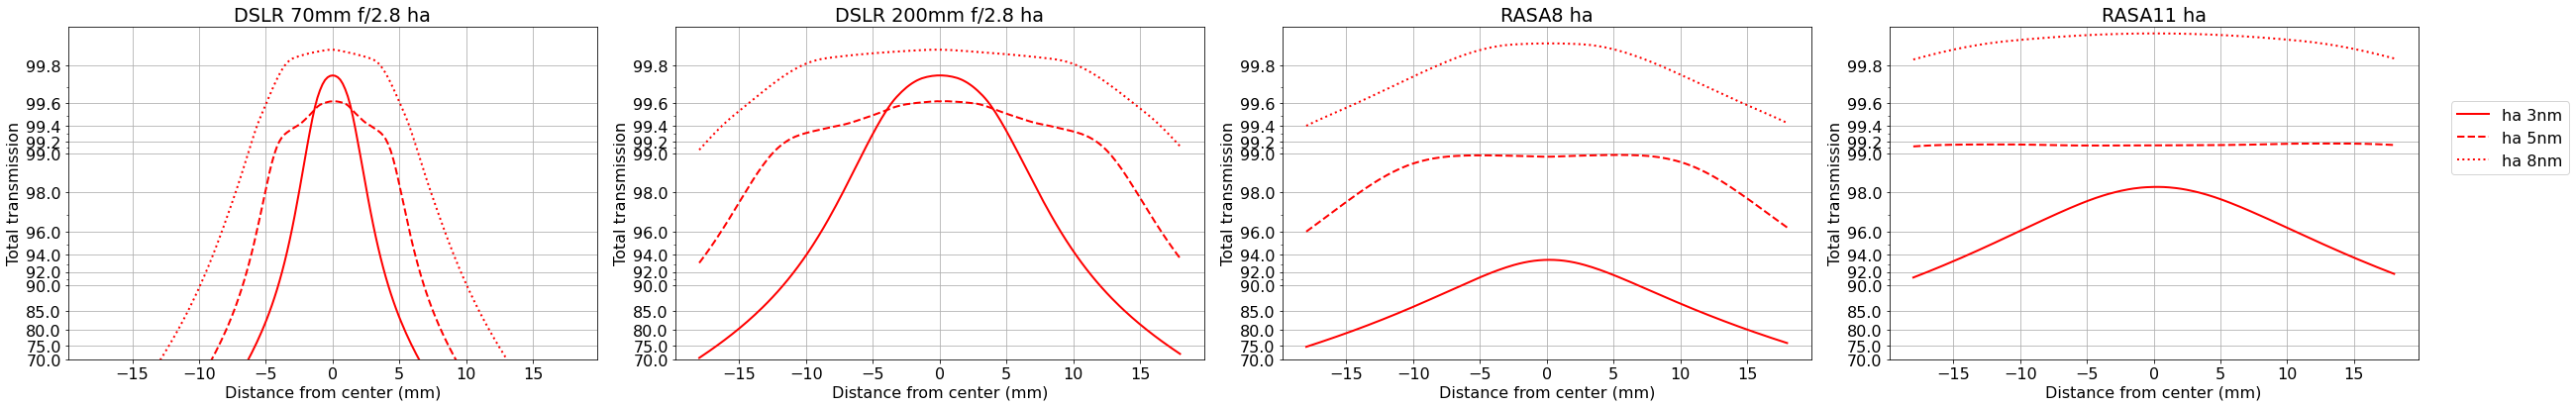

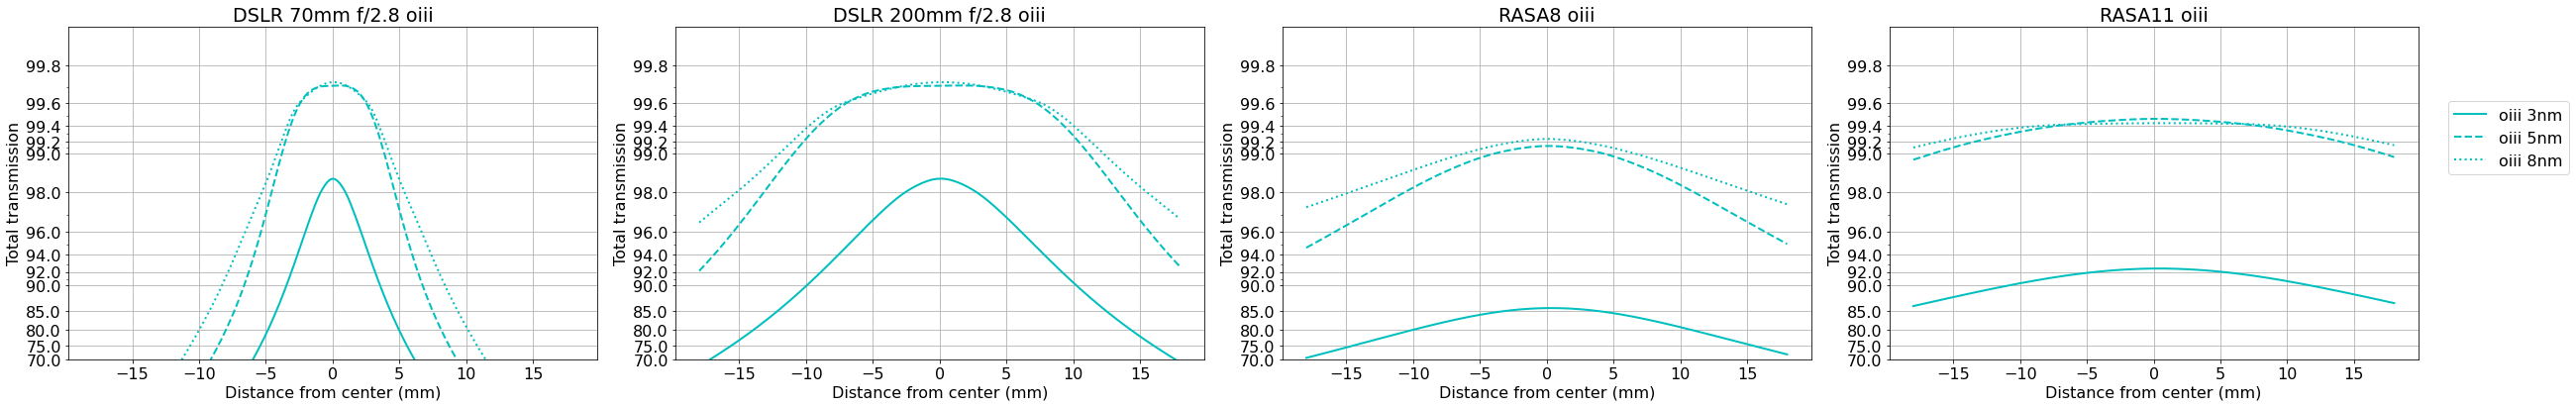

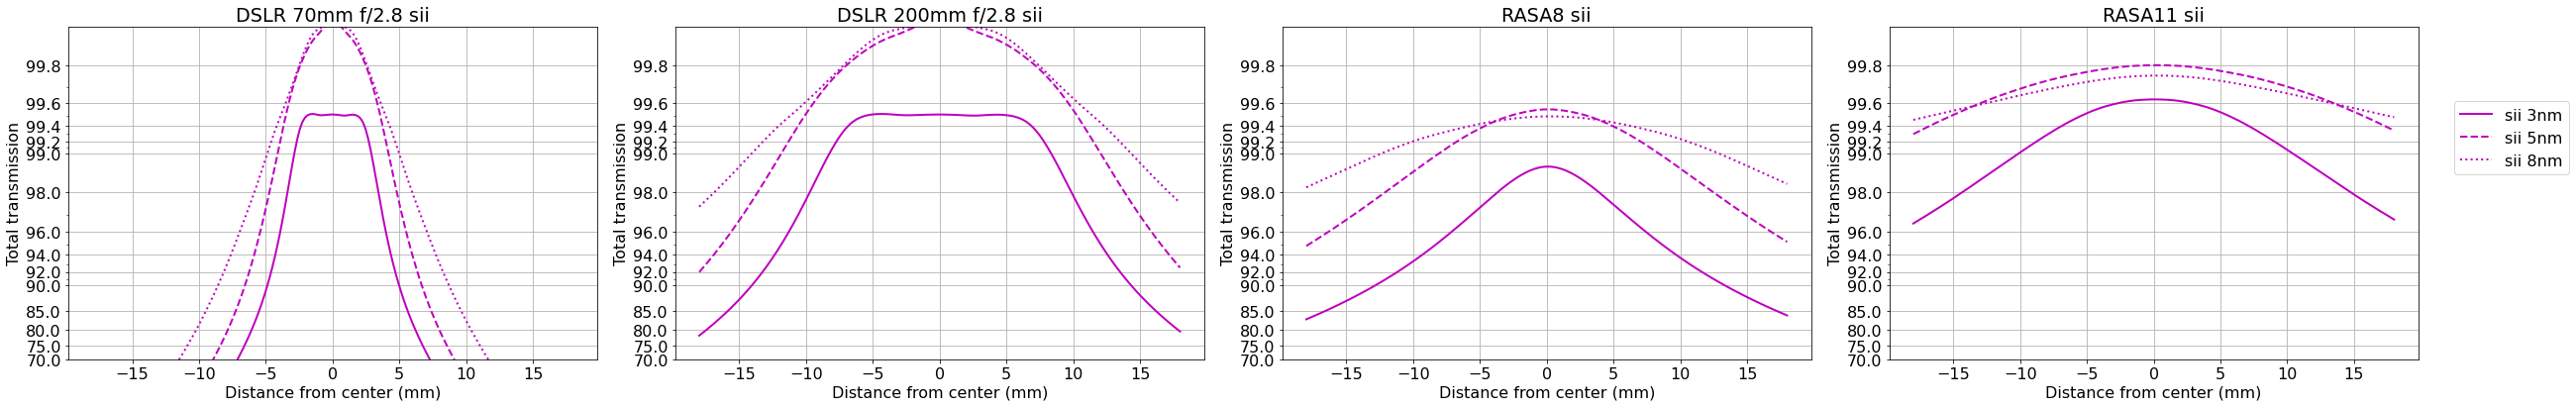

In [190]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# RASA whitepaper: https://s3.amazonaws.com/celestron-site-support-files/support_files/rasa_white_paper_web.pdf

optics = {'DSLR 70mm f/2.8': {'aperture': 25,
                              'f_ratio': 2.8,
                              'r_min': 0},          
          'DSLR 200mm f/2.8': {'aperture': 72,
                               'f_ratio': 2.8,
                               'r_min': 0},                    
          'RASA8': {'aperture': 200,
                    'f_ratio': 2,
                    'r_min': 93/2},
          'RASA11': {'aperture': 280,
                     'f_ratio': 2.2,
                     'r_min': 114/2},
          
         }

filter_names = ['ha', 'oiii', 'sii']
bandpasses = ['3nm', '5nm', '8nm']

n_panel = len(optics)

for filter_name in filter_names:
    plt.figure(figsize=(n_panel * 9, 6))

    for i_panel, (optic_name, specs) in enumerate(optics.items()):
        plt.subplot(1, n_panel, i_panel + 1)
        aperture = specs['aperture']
        f_ratio = specs['f_ratio']

        focal_length = aperture * f_ratio

        r_min = specs['r_min']
        r_max = aperture / 2
        
        for bandpass in bandpasses:

            args = dict(r_min=r_min,
                       r_max=r_max,
                       focal_length=focal_length,
                       filter_name=filter_name,
                       bandpass=bandpass)

            T = transmission_chip(X, Y, **args)
            i = int(X.shape[0] / 2)
            plt.plot(X[i, :], T[i, :], label=f'{filter_name} {bandpass}', color=color[filter_name], lw=2, linestyle=styles[bandpass])
            plt.title(f'{optic_name} {filter_name}')
            plt.grid()
            plt.xlabel('Distance from center (mm)')
            plt.ylabel('Total transmission')
            plt.yscale('logit')
            plt.ylim(0.7, 0.999)
            plt.gca().yaxis.set_minor_formatter(NullFormatter())
            yticks = list(np.linspace(0.7, 0.9, 5)) + [0.92, 0.94, 0.96, 0.98, 0.99] + list(np.linspace(0.992, 0.998, 4))
            plt.yticks(yticks, np.array(yticks)*100)
            if i_panel + 1 == n_panel:
                plt.legend(bbox_to_anchor=[1, .5, .3, .3])
    plt.tight_layout()
    plt.savefig(f'./transmissions/{filter_name}_transmission.png')
#     break
    

In [6]:
df_ha

NameError: name 'df_ha' is not defined

In [6]:
df_ha

NameError: name 'df_ha' is not defined

In [6]:
df_ha

NameError: name 'df_ha' is not defined